### L5 - Kajetan Walawski

In [1]:
# Zaimportowanie bibliotek
import pandas as pd
import csv
import matplotlib.pyplot as plt

# Pobranie danych z oryginalnego pliku drinks.csv
drinks = pd.read_csv('../OriginalData/drinks.csv')

# Wyświetlenie informacji o bazie danych
print("Podstawowe informacje o bazie: \n")
drinks.info()

print("\nOryginalna baza danych:")
display(drinks)

Podstawowe informacje o bazie: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB

Oryginalna baza danych:


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


### Metadata

In [2]:
print("Indeksy w całym zbiorze danych:")
print("    {} - {}".format(drinks.index[0], drinks.index[-1]))

print("\nSpożycie piwa:")
print("    {} - {}".format(drinks["beer_servings"].min(), drinks["beer_servings"].max()))

print("\nSpożycie spirytusu:")
print("    {} - {}".format(drinks["spirit_servings"].min(), drinks["spirit_servings"].max()))

print("\nSpożycie wina:")
print("    {} - {}".format(drinks["wine_servings"].min(), drinks["wine_servings"].max()))

print("\nCałkowite spożycie czystego alkoholu:")
print("    {} - {}".format(drinks["total_litres_of_pure_alcohol"].min(), drinks["total_litres_of_pure_alcohol"].max()))

Indeksy w całym zbiorze danych:
    0 - 192

Spożycie piwa:
    0 - 376

Spożycie spirytusu:
    0 - 438

Spożycie wina:
    0 - 370

Całkowite spożycie czystego alkoholu:
    0.0 - 14.4


### Modyfikacja danych

In [3]:
# Usunięcie krajów, w których spożycie alkoholu było równe zero
drinks_without_zeros = drinks.loc[(drinks[['total_litres_of_pure_alcohol']] != 0).all(axis=1)]

# Zapis zmodyfikowanych danych do pliku drinks_no_zeros.csv
from pathlib import Path  
filepath = Path('../AnalysisData/drinks_no_zeros.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)
drinks_without_zeros.to_csv(filepath) 

# Wczytanie nowych danych
drinks_new = pd.read_csv('../AnalysisData/drinks_no_zeros.csv')

print("\nUsunięto ze zbioru {} krajów.".format(drinks.index[-1] - drinks_new.index[-1]))


Usunięto ze zbioru 13 krajów.


### Data appendix

In [4]:
drinks_new.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
print("Podstawowe informacje o bazie:")
drinks_new.info()

Podstawowe informacje o bazie:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       180 non-null    object 
 1   beer_servings                 180 non-null    int64  
 2   spirit_servings               180 non-null    int64  
 3   wine_servings                 180 non-null    int64  
 4   total_litres_of_pure_alcohol  180 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.2+ KB


In [6]:
print("Indeksy w nowym zbiorze danych:")
print("    {} - {}".format(drinks_new.index[0], drinks_new.index[-1]))

print("\nSpożycie piwa:")
print("    {} - {}".format(drinks_new["beer_servings"].min(), drinks_new["beer_servings"].max()))

print("\nSpożycie spirytusu:")
print("    {} - {}".format(drinks_new["spirit_servings"].min(), drinks_new["spirit_servings"].max()))

print("\nSpożycie wina:")
print("    {} - {}".format(drinks_new["wine_servings"].min(), drinks_new["wine_servings"].max()))

print("\nCałkowite spożycie czystego alkoholu:")
print("    {} - {}".format(drinks_new["total_litres_of_pure_alcohol"].min(), drinks_new["total_litres_of_pure_alcohol"].max()))

Indeksy w nowym zbiorze danych:
    0 - 179

Spożycie piwa:
    0 - 376

Spożycie spirytusu:
    0 - 438

Spożycie wina:
    0 - 370

Całkowite spożycie czystego alkoholu:
    0.1 - 14.4


### Wykresy

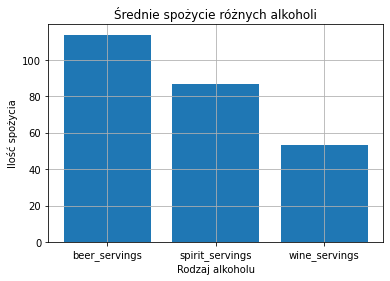

In [7]:
beer_mean = drinks_new["beer_servings"].mean()
spirit_mean = drinks_new["spirit_servings"].mean()
wine_mean = drinks_new["wine_servings"].mean()
alc_mean = drinks_new["total_litres_of_pure_alcohol"].mean()
means = [beer_mean, spirit_mean, wine_mean]
names = ["beer_servings", "spirit_servings", "wine_servings"]
plt.bar(names, means)
plt.xlabel('Rodzaj alkoholu')
plt.ylabel('Ilość spożycia')
plt.grid()
plt.title('Średnie spożycie różnych alkoholi')
plt.show()

Text(0.5, 0, 'Nazwy krajów')

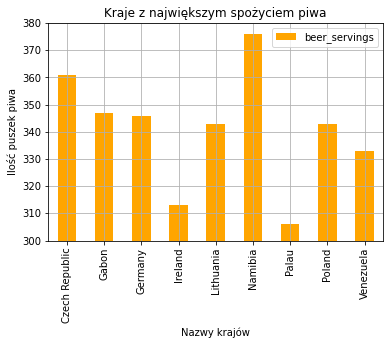

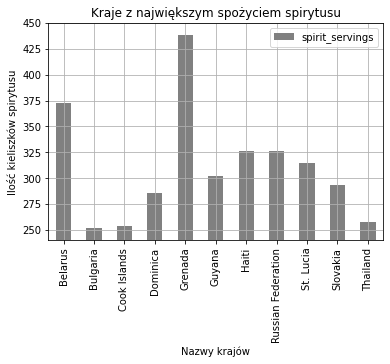

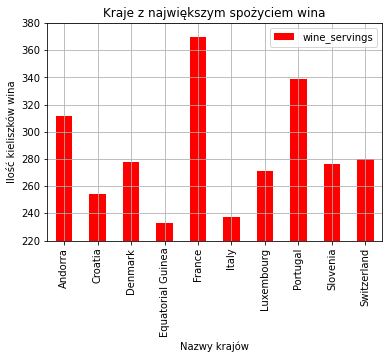

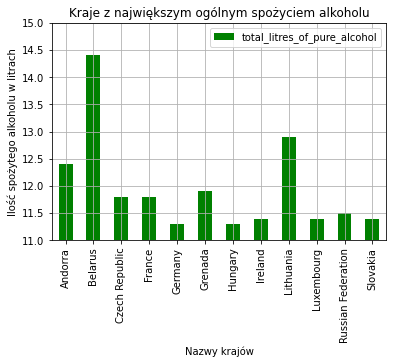

In [8]:
alotofbeer = drinks_new[drinks_new['beer_servings'] > 300]
alotofspirit = drinks_new[drinks_new['spirit_servings'] > 250]
alotofwine = drinks_new[drinks_new['wine_servings'] > 230]
alotofalcohol = drinks_new[drinks_new['total_litres_of_pure_alcohol'] > 11]

ax1 = alotofbeer.plot.bar(x='country', y='beer_servings', color='orange')
ax1.set_title('Kraje z największym spożyciem piwa')
ax1.grid()
ax1.set_ylim(300, 380)
ax1.set_ylabel('Ilość puszek piwa')
ax1.set_xlabel('Nazwy krajów')

ax2 = alotofspirit.plot.bar(x='country', y='spirit_servings', color='gray')
ax2.set_title('Kraje z największym spożyciem spirytusu')
ax2.grid()
ax2.set_ylim(240, 450)
ax2.set_ylabel('Ilość kieliszków spirytusu')
ax2.set_xlabel('Nazwy krajów')

ax3 = alotofwine.plot.bar(x='country', y='wine_servings', color='red')
ax3.set_title('Kraje z największym spożyciem wina')
ax3.grid()
ax3.set_ylim(220, 380)
ax3.set_ylabel('Ilość kieliszków wina')
ax3.set_xlabel('Nazwy krajów')

ax4 = alotofalcohol.plot.bar(x='country', y='total_litres_of_pure_alcohol', color='green')
ax4.set_title('Kraje z największym ogólnym spożyciem alkoholu')
ax4.grid()
ax4.set_ylim(11, 15)
ax4.set_ylabel('Ilość spożytego alkoholu w litrach')
ax4.set_xlabel('Nazwy krajów')